# Q1

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("yield_data.csv")

In [5]:
df

,I,Temp,Yield
0,1,50,3.3
1,2,50,2.8
2,3,50,2.9
3,4,70,2.3
4,5,70,2.6
5,6,70,2.1
6,7,80,2.5
7,8,80,2.9
8,9,80,2.4
9,10,90,3.0


In [15]:
X = df['Temp'].values
y = df['Yield'].values
X_mean = np.mean(X)
y_mean = np.mean(y)
Xy_mean = np.mean(X*y)
X2_mean = np.mean(X**2)
B1 = (Xy_mean-X_mean*y_mean)/(X2_mean-X_mean**2)
B0 = y_mean-B1*X_mean
y_pred = B0+B1*X

RMSE = np.sqrt(np.mean((y-y_pred)**2))
print(f"Intercept (B0) : {B0:.2f}")
print(f"Slope (B1) : {B1:.2f}")
print(f"RMSE : {RMSE:.2f}")

Intercept (B0) : 2.31
Slope (B1) : 0.01
RMSE : 0.36


In [28]:
mat1 = np.array([[len(X),np.sum(X),np.sum(X**2)],
                [np.sum(X),np.sum(X**2),np.sum(X**3)],
               [np.sum(X**2),np.sum(X**3),np.sum(X**4)]])
mat2 = np.array([np.sum(y),np.sum(X*y),np.sum((X**2)*y)])
coeffs = np.dot(np.linalg.inv(mat1),mat2.T)
b0,b1,b2 = coeffs[0],coeffs[1],coeffs[2]
y_pred = b0+b1*X+b2*(X**2)
sq_err = (y-y_pred)**2
rmse_mat = np.sqrt(np.mean(sq_err))
print(f"{b0:.2f}{b1:.2f}x+{b2:.4f}x^2")
print(f"RSME:{rmse_mat:.4f}")

7.96-0.15x+0.0011x^2
RSME:0.2186


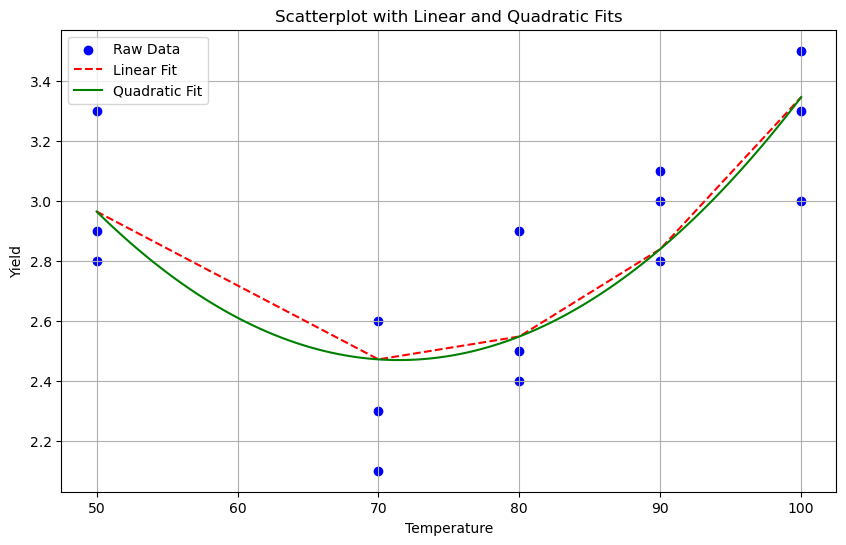

In [43]:
plt.figure(figsize=(10, 6))

plt.scatter(X, y, color='blue', label='Raw Data')

plt.plot(X, y_pred, color='red', linestyle='--', label='Linear Fit')

x_range = np.linspace(min(X), max(X), 100)
y_pred_quad_range = b0 + b1 * x_range + b2 * (x_range**2)
plt.plot(x_range, y_pred_quad_range, color='green', linestyle='-', label='Quadratic Fit')

plt.xlabel('Temperature')
plt.ylabel('Yield')
plt.title('Scatterplot with Linear and Quadratic Fits')
plt.legend()
plt.grid(True)
plt.show()

# Q2

In [78]:
df = pd.read_csv("rabbit_experiment.csv")
x1 = df['Area'].values
x2 = df['X2'].values
y = df['Infarc'].values
x3 = df['X3'].values

mat1 = np.array([[len(x1),np.sum(x1),np.sum(x2),np.sum(x3)],
                [np.sum(x1),np.sum(x1**2),np.sum(x1*x2),np.sum(x1*x2)],
                [np.sum(x2),np.sum(x1*x2),np.sum(x2**2),np.sum(x1*x2)],
                [np.sum(x3),np.sum(x1*x3),np.sum(x2*x3),np.sum(x3**2)],
                ])
mat2 = np.array([np.sum(y),np.sum(x1*y),np.sum(x2*y),np.sum(x3*y)])

In [79]:
coeffs = np.dot(np.linalg.inv(mat1),mat2.T)

In [83]:
b0, b1, b2, b3 = coeffs
print(f"Fitted equation: y = {b0:.2f} + {b1:.2f}x1 + {b2:.2f}x2 + {b3:.2f}x3")

Fitted equation: y = -0.13 + 0.57x1 + -0.18x2 + -0.03x3


Mean Squared Error (MSE): 0.02
Root Mean Squared Error (RMSE): 0.13


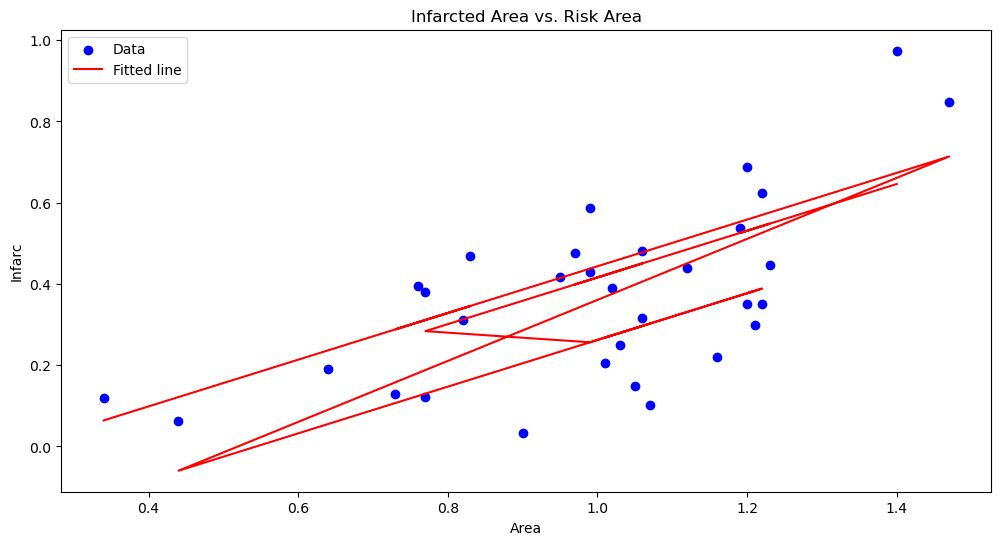

In [85]:
X = np.column_stack((np.ones(len(x1)), x1, x2, x3))
y_pred = np.dot(X, coeffs)

residuals = y - y_pred
MSE = np.mean(residuals**2)
RMSE = np.sqrt(MSE)

print(f"Mean Squared Error (MSE): {MSE:.2f}")
print(f"Root Mean Squared Error (RMSE): {RMSE:.2f}")

plt.figure(figsize=(12, 6))

plt.scatter(x1, y, color='blue', label='Data')

plt.plot(x1, y_pred, color='red', label='Fitted line')

plt.xlabel('Area')
plt.ylabel('Infarc')
plt.title('Infarcted Area vs. Risk Area')
plt.legend()
plt.show()

In [86]:
print(f"Fitted equation: y = {b0:.2f} + {b1:.2f}x1 + {b2:.2f}x2 + {b3:.2f}x3")

Fitted equation: y = -0.13 + 0.57x1 + -0.18x2 + -0.03x3
